### Importing of Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
sns.set_theme(style="ticks", color_codes=True)


import warnings
%matplotlib inline

### Loading of Data set

In [2]:
## Loading in the dataset and using the 'Employee ID' as the index
df = pd.read_csv('employee_burnout.csv', index_col = 'Employee ID') 

In [3]:
## checking the shape of the dataset, rows and columns
print('Shape of data:', df.shape)

Shape of data: (35000, 8)


## Exploring the  Data

In [4]:
df.head()  ## checking the five (5) rows

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Employee ID,,,,,,,,
fffe32003000360033003200,30/09/2008,Female,Service,No,2,3.0,3.8,0.16
fffe3700360033003500,30/11/2008,Male,Service,Yes,1,2.0,5.0,0.36
fffe31003300320037003900,10/03/2008,Female,Product,Yes,2,NaN,5.8,0.49
fffe32003400380032003900,03/11/2008,Male,Service,Yes,1,1.0,2.6,0.20
fffe31003900340031003600,24/07/2008,Female,Service,No,3,7.0,6.9,0.52


In [5]:
df.info() ## checking the info of the dataset (the number of rows, colummns, data types, and non-null count)

<class 'pandas.core.frame.DataFrame'>
Index: 35000 entries, fffe32003000360033003200 to fffe32003100390037003800
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date of Joining       35000 non-null  object 
 1   Gender                35000 non-null  object 
 2   Company Type          35000 non-null  object 
 3   WFH Setup Available   35000 non-null  object 
 4   Designation           35000 non-null  int64  
 5   Resource Allocation   33619 non-null  float64
 6   Mental Fatigue Score  32883 non-null  float64
 7   Burn Rate             33876 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.4+ MB


In [6]:
# checking for missing values in percentage
df.isna().mean()*100

Date of Joining         0.000000
Gender                  0.000000
Company Type            0.000000
WFH Setup Available     0.000000
Designation             0.000000
Resource Allocation     3.945714
Mental Fatigue Score    6.048571
Burn Rate               3.211429
dtype: float64

In [7]:
### check for the descriptives statistics
df.describe().T  

,count,mean,std,min,25%,50%,75%,max
Designation,35000.0,2.177514,1.134339,0.0,1.00,2.00,3.000000,5.0
Resource Allocation,33619.0,4.473185,2.046623,1.0,3.00,4.00,6.000000,10.0
Mental Fatigue Score,32883.0,5.725350,1.918292,0.0,4.50,5.90,7.100000,10.0
Burn Rate,33876.0,0.451379,0.194797,0.0,0.32,0.45,0.588831,1.0


In [8]:
### Checking for the unique values in the dataset to determine the categorical variables 

for col in df:
    print(colored(col, 'red' , attrs = ['bold']))
    print(df[col].unique())
    print()

Date of Joining
['30/09/2008' '30/11/2008' '10/03/2008' '03/11/2008' '24/07/2008'
 '26/11/2008' '02/01/2008' '31/10/2008' '27/12/2008' '09/03/2008'
 '16/03/2008' '12/05/2008' '20/01/2008' '23/02/2008' '14/05/2008'
 '03/02/2008' '17/03/2008' '28/03/2008' '29/05/2008' '27/06/2008'
 '31/08/2008' '15/01/2008' '04/05/2008' '17/11/2008' '14/09/2008'
 '09/10/2008' '11/10/2008' '18/09/2008' '16/09/2008' '16/12/2008'
 '03/05/2008' '04/08/2008' '31/07/2008' '17/06/2008' '28/04/2008'
 '30/10/2008' '27/02/2008' '22/06/2008' '18/02/2008' '24/06/2008'
 '08/12/2008' '05/08/2008' '11/04/2008' '26/03/2008' '09/08/2008'
 '28/08/2008' '21/03/2008' '22/07/2008' '20/05/2008' '23/01/2008'
 '10/09/2008' '26/05/2008' '22/12/2008' '08/04/2008' '25/02/2008'
 '24/04/2008' '08/01/2008' '20/11/2008' '11/09/2008' '11/06/2008'
 '28/02/2008' '20/08/2008' '18/10/2008' '14/08/2008' '17/07/2008'
 '05/07/2008' '04/02/2008' '01/08/2008' '01/05/2008' '21/05/2008'
 '21/10/2008' '19/03/2008' '27/09/2008' '12/03/2008' '17/09/

In [9]:
## checking the columns in order to split them 
df.columns

Index(['Date of Joining', 'Gender', 'Company Type', 'WFH Setup Available',
       'Designation', 'Resource Allocation', 'Mental Fatigue Score',
       'Burn Rate'],
      dtype='object')

In [10]:
### Splitting the dataset into categorical

cat = ['Gender', 'Company Type', 'WFH Setup Available', 'Designation', 'Resource Allocation']
tar = ['Burn Rate']
num = ['Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']

In [11]:
for col in df:
    if col in cat:
        print(colored(col, 'red' , attrs = ['bold']))
        print(df[col].value_counts())
        print('-------------------------')

Gender
Female    18353
Male      16647
Name: Gender, dtype: int64
-------------------------
Company Type
Service    22837
Product    12163
Name: Company Type, dtype: int64
-------------------------
WFH Setup Available
Yes    18928
No     16072
Name: WFH Setup Available, dtype: int64
-------------------------
Designation
2    11661
3     9261
1     7467
4     3669
0     2349
5      593
Name: Designation, dtype: int64
-------------------------
Resource Allocation
4.0     6082
5.0     6081
3.0     5052
6.0     4700
2.0     3267
7.0     3006
1.0     2847
8.0     1644
9.0      680
10.0     260
Name: Resource Allocation, dtype: int64
-------------------------


### Dealing with Missing Values

In [12]:
index = ['Designation','Resource Allocation','Mental Fatigue Score','Burn Rate']
columns = ['original', 'dropna']
df_ = pd.DataFrame(index=index, columns=columns)

for i in index:
    value_og = '{:.3f} ({:.3f})'.format(df[i].mean(), df[i].std())
    df_.loc[i, 'original'] = value_og
    
for i in index:
    value_na = '{:.3f} ({:.3f})'.format(df.dropna()[i].mean(), df.dropna()[i].std())
    df_.loc[i, 'dropna'] = value_na
    
df_

,original,dropna
Designation,2.178 (1.134),2.178 (1.133)
Resource Allocation,4.473 (2.047),4.476 (2.045)
Mental Fatigue Score,5.725 (1.918),5.728 (1.918)
Burn Rate,0.451 (0.195),0.452 (0.194)


In [13]:
df = df.dropna()
df.isna().mean()*100

Date of Joining         0.0
Gender                  0.0
Company Type            0.0
WFH Setup Available     0.0
Designation             0.0
Resource Allocation     0.0
Mental Fatigue Score    0.0
Burn Rate               0.0
dtype: float64

### Converting Data Types

In [14]:
df['Date of Joining'] = pd.to_datetime(df['Date of Joining'])

df['Designation'] = df['Designation'].astype('int64')
df['Resource Allocation'] = df['Resource Allocation'].astype('int64')

In [15]:
df.dtypes

Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                      int64
Resource Allocation              int64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

In [16]:
df.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Employee ID,,,,,,,,
fffe32003000360033003200,2008-09-30,Female,Service,No,2,3,3.8,0.16
fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2,5.0,0.36
fffe32003400380032003900,2008-03-11,Male,Service,Yes,1,1,2.6,0.20
fffe31003900340031003600,2008-07-24,Female,Service,No,3,7,6.9,0.52
fffe3300350037003500,2008-11-26,Male,Product,Yes,2,4,3.6,0.29


In [17]:
df.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Employee ID,,,,,,,,
fffe32003000360033003200,2008-09-30,Female,Service,No,2,3,3.8,0.16
fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2,5.0,0.36
fffe32003400380032003900,2008-03-11,Male,Service,Yes,1,1,2.6,0.20
fffe31003900340031003600,2008-07-24,Female,Service,No,3,7,6.9,0.52
fffe3300350037003500,2008-11-26,Male,Product,Yes,2,4,3.6,0.29


### Graphical EDA

#### Numerical Data

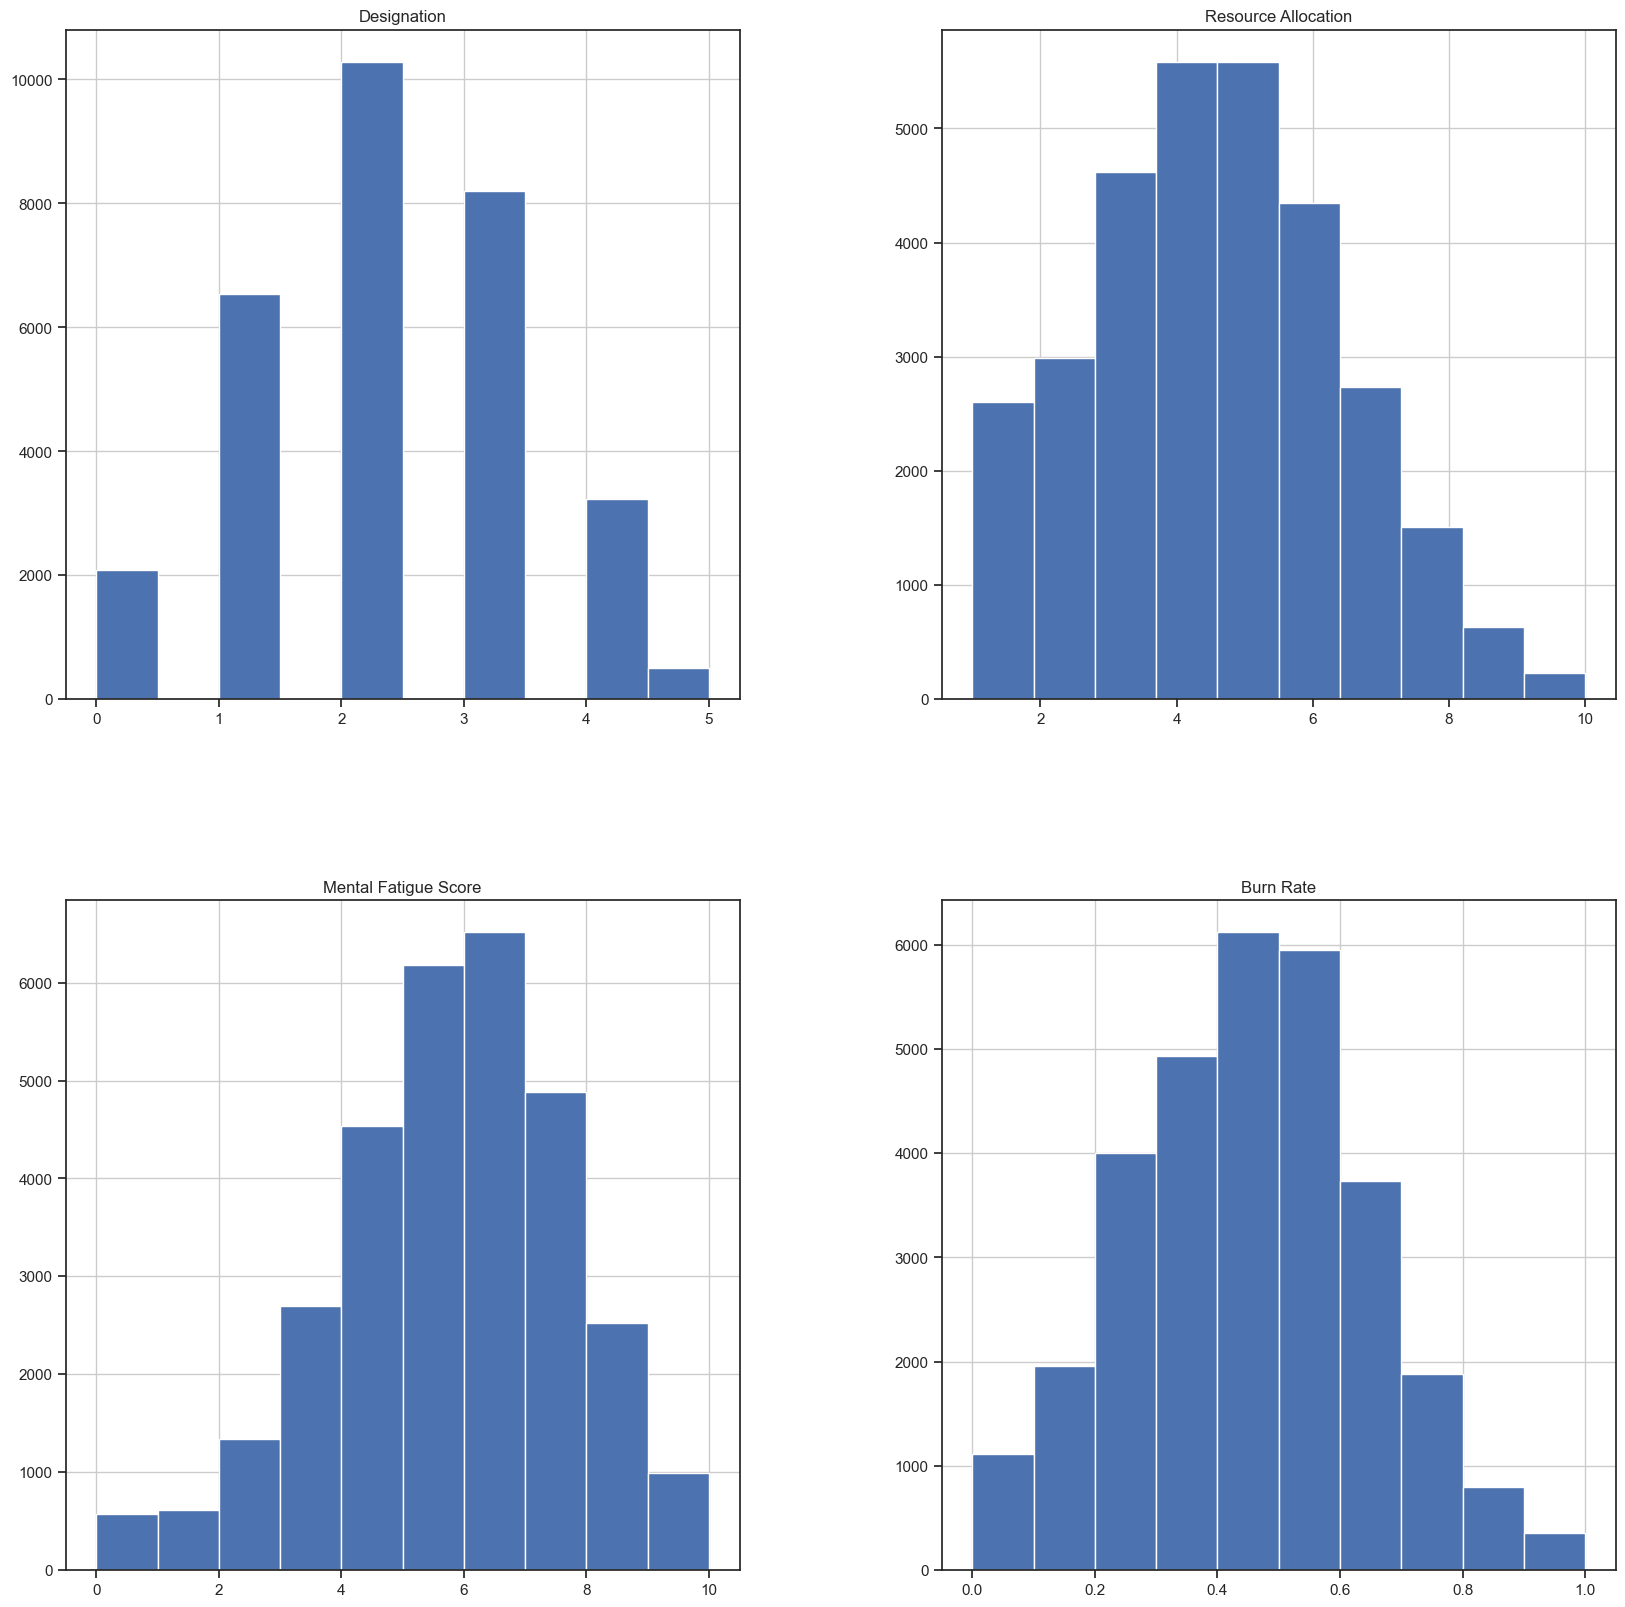

In [18]:
df[num].hist(figsize=(20,20))
plt.show()

#### Correlation

In [19]:
df_corr = df.corr()
df_corr

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.877783,0.690676,0.749519
Resource Allocation,0.877783,1.000000,0.798872,0.869745
Mental Fatigue Score,0.690676,0.798872,1.000000,0.955407
Burn Rate,0.749519,0.869745,0.955407,1.000000


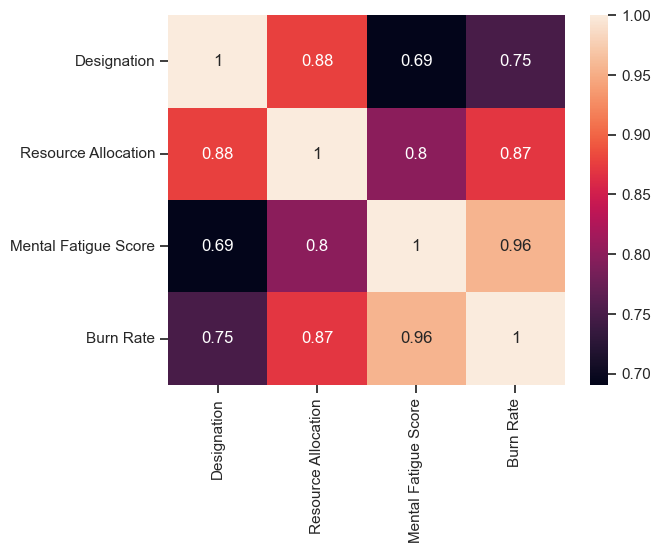

In [21]:
ax = sns.heatmap(df_corr, annot=True)

#### Bivariate Analysis of the Numerical Data and the Burn Rate

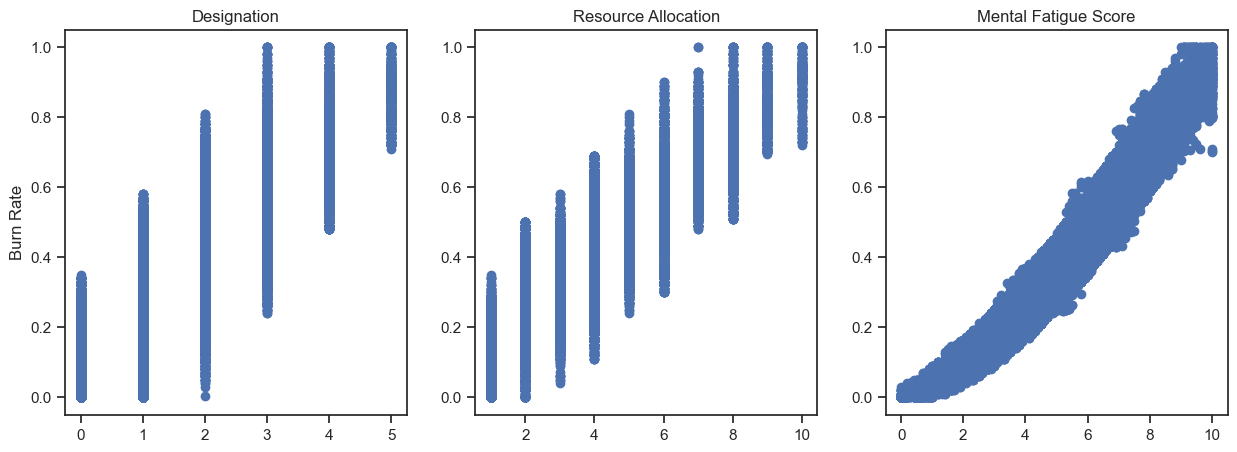

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(df['Designation'],df['Burn Rate'])
axs[0].set_title('Designation')
axs[0].set(ylabel='Burn Rate')
axs[1].scatter(df['Resource Allocation'],df['Burn Rate'])
axs[1].set_title('Resource Allocation')
axs[2].scatter(df['Mental Fatigue Score'],df['Burn Rate'])
axs[2].set_title('Mental Fatigue Score')
plt.show()

### Univariate EDA on the Categorical Variables

#### Univariate EDA on Gender

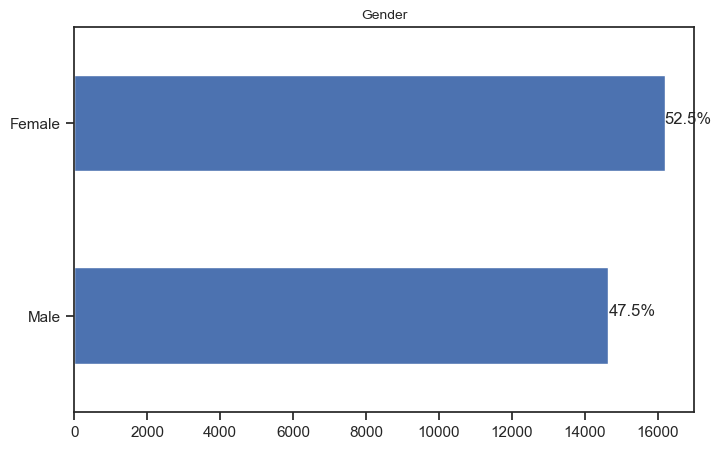

In [23]:
ax = df["Gender"].value_counts().sort_values().plot(kind = 'barh', figsize=(8,5))
plt.title("Gender", fontdict={'size': 10})
for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

#### Univariate EDA on Company Type

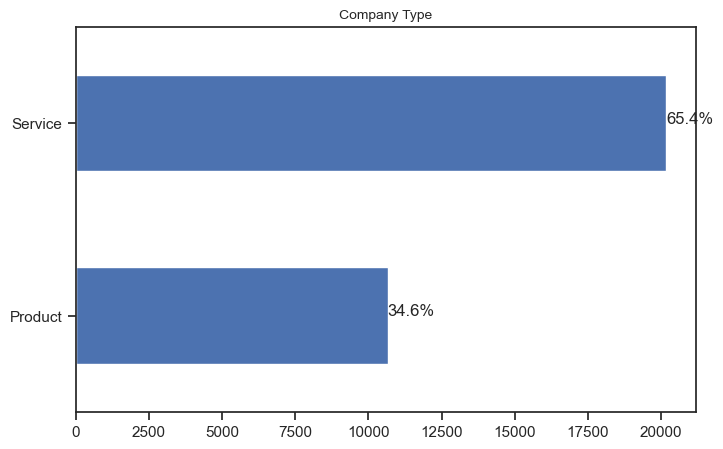

In [24]:
ax = df["Company Type"].value_counts().sort_values().plot(kind = 'barh', figsize=(8,5))
plt.title("Company Type", fontdict={'size': 10})
for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

#### Univariate EDA on WFH Setup Available

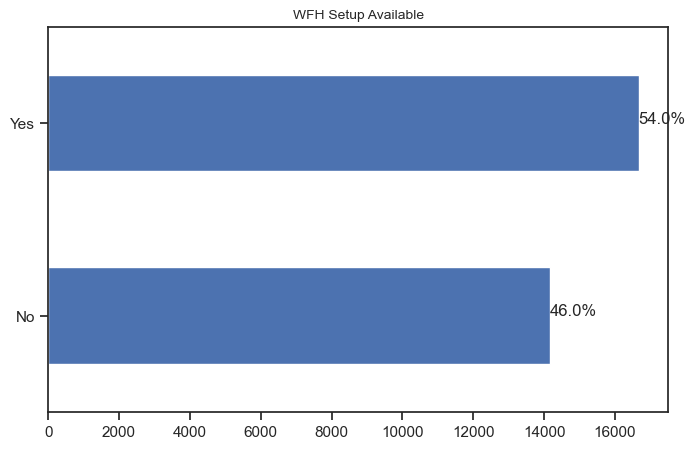

In [25]:
ax = df["WFH Setup Available"].value_counts().sort_values().plot(kind = 'barh', figsize=(8,5))
plt.title("WFH Setup Available", fontdict={'size': 10})
for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

#### Univariate EDA on Designation

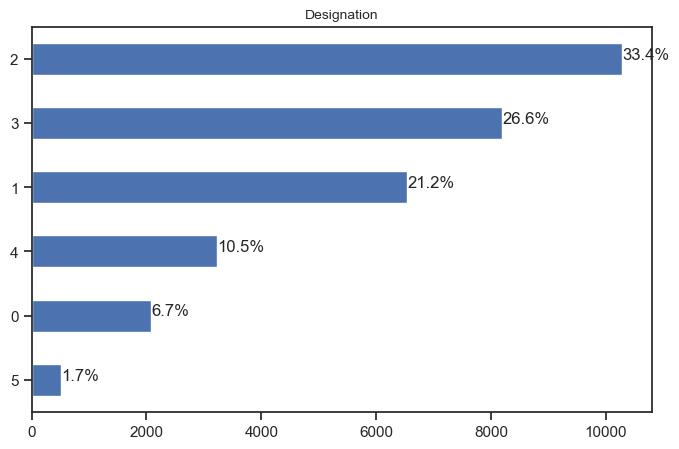

In [26]:
ax = df["Designation"].value_counts().sort_values().plot(kind = 'barh', figsize=(8,5))
plt.title("Designation", fontdict={'size': 10})
for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

#### Univariate EDA on Resource ALlocation

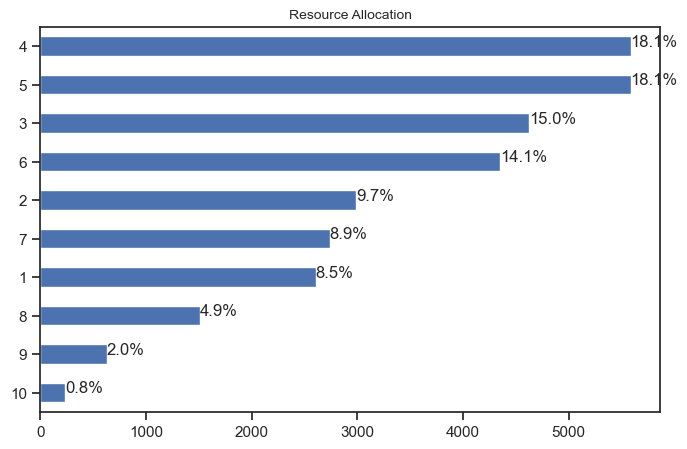

In [27]:
ax = df["Resource Allocation"].value_counts().sort_values().plot(kind = 'barh', figsize=(8,5))
plt.title("Resource Allocation", fontdict={'size': 10})
for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

### Biviriate EDA of the Categorical Variables against the Burn Rate

#### 1. Gender vs Burn Rate

In [28]:
df[['Gender', 'Burn Rate']].groupby('Gender').agg('mean')

,Burn Rate
Gender,
Female,0.422401
Male,0.483838


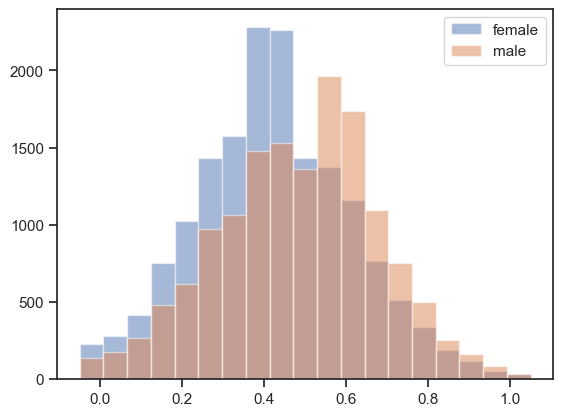

In [29]:
female_burn_rates = df[df['Gender']=='Female']['Burn Rate']
male_burn_rates = df[df['Gender']=='Male']['Burn Rate']

bins = np.linspace(-.05, 1.05, 20)

plt.hist(female_burn_rates, bins, label='female', alpha=0.5)
plt.hist(male_burn_rates, bins, label='male', alpha=0.5)
plt.legend(loc='upper right')
plt.show()

#### 2: WFH Setup Available vs Burn Rate

In [30]:
df[['WFH Setup Available', 'Burn Rate']].groupby('WFH Setup Available').agg('mean')

,Burn Rate
WFH Setup Available,
No,0.518198
Yes,0.394940


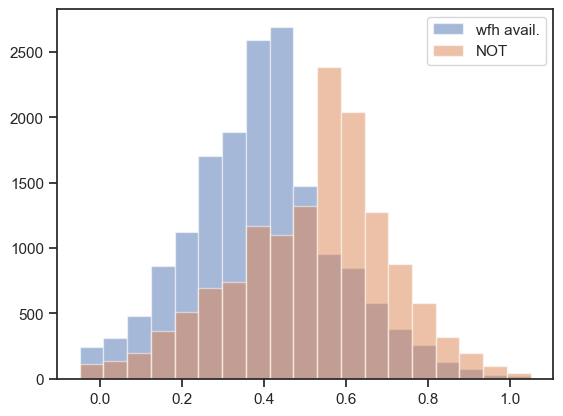

In [32]:
wfh_burn_rates = df[df['WFH Setup Available']=='Yes']['Burn Rate']
nwfh_burn_rates = df[df['WFH Setup Available']=='No']['Burn Rate']

bins = np.linspace(-.05, 1.05, 20)

plt.hist(wfh_burn_rates, bins, label='wfh avail.', alpha=0.5)
plt.hist(nwfh_burn_rates, bins, label='NOT', alpha=0.5)
plt.legend(loc='upper right')
plt.show()

#### 3: Company Type vs Burn Rate

In [33]:
df[['Company Type', 'Burn Rate']].groupby('Company Type').agg('mean')

,Burn Rate
Company Type,
Product,0.452257
Service,0.451224


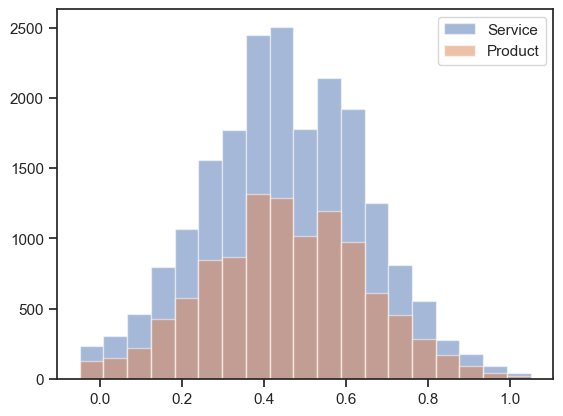

In [34]:
service_burn_rates = df[df['Company Type']=='Service']['Burn Rate']
product_burn_rates = df[df['Company Type']=='Product']['Burn Rate']

bins = np.linspace(-.05, 1.05, 20)

plt.hist(service_burn_rates, bins, label='Service', alpha=0.5)
plt.hist(product_burn_rates, bins, label='Product', alpha=0.5)
plt.legend(loc='upper right')
plt.show()

### Extracting Target Variables (Label)

In [44]:
df.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Month of Joining,Quarter of Joining,Season of Joining
Employee ID,,,,,,,,,,,
fffe32003000360033003200,2008-09-30,Female,Service,No,2,3,3.8,0.16,9,3,Autumn
fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2,5.0,0.36,11,4,Autumn
fffe32003400380032003900,2008-03-11,Male,Service,Yes,1,1,2.6,0.20,3,1,Winter
fffe31003900340031003600,2008-07-24,Female,Service,No,3,7,6.9,0.52,7,3,Summer
fffe3300350037003500,2008-11-26,Male,Product,Yes,2,4,3.6,0.29,11,4,Autumn


In [45]:
def make_labels(Burn_Rate):
    if Burn_Rate >= 0.5:
        return 'Yes'
    else:
        return 'No' 

In [46]:
df['Burn Out'] = df['Burn Rate'].apply(make_labels)

In [47]:
df.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Month of Joining,Quarter of Joining,Season of Joining,Burn Out
Employee ID,,,,,,,,,,,,
fffe32003000360033003200,2008-09-30,Female,Service,No,2,3,3.8,0.16,9,3,Autumn,No
fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2,5.0,0.36,11,4,Autumn,No
fffe32003400380032003900,2008-03-11,Male,Service,Yes,1,1,2.6,0.20,3,1,Winter,No
fffe31003900340031003600,2008-07-24,Female,Service,No,3,7,6.9,0.52,7,3,Summer,Yes
fffe3300350037003500,2008-11-26,Male,Product,Yes,2,4,3.6,0.29,11,4,Autumn,No


#### Univaraite Analysis of the Burn out

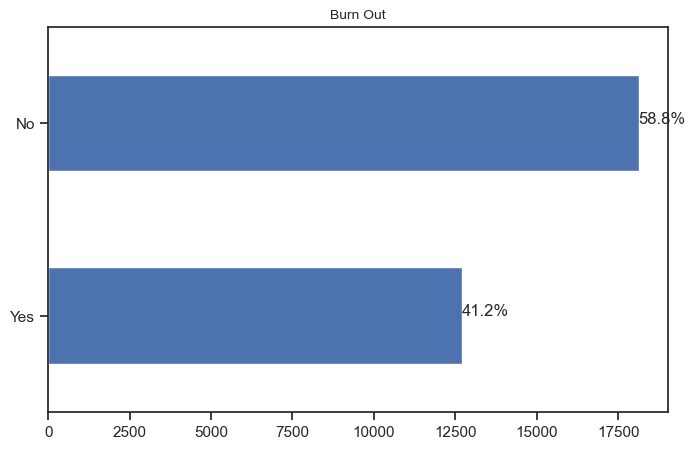

In [48]:
ax = df["Burn Out"].value_counts().sort_values().plot(kind = 'barh', figsize=(8,5))
plt.title("Burn Out", fontdict={'size': 10})
for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

### Bivariate Analysis Between the Burn out and the Categorical Variables

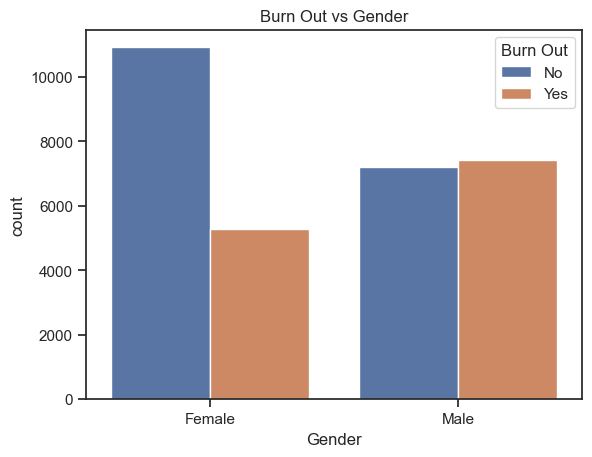

In [49]:
sns.countplot(x='Gender',hue='Burn Out',data=df)
sns.set(rc={'figure.figsize':(5,5)})
plt.title("Burn Out vs Gender");

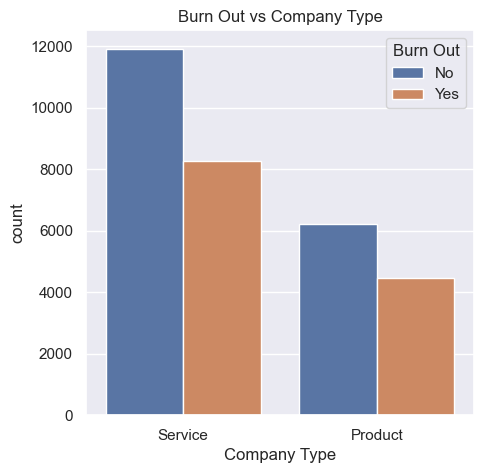

In [50]:
sns.countplot(x='Company Type',hue='Burn Out',data=df)
sns.set(rc={'figure.figsize':(5,5)})
plt.title("Burn Out vs Company Type");

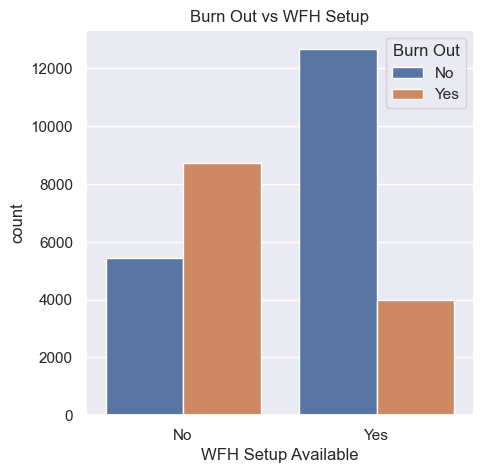

In [51]:
sns.countplot(x='WFH Setup Available',hue='Burn Out',data=df)
sns.set(rc={'figure.figsize':(5,5)})
plt.title("Burn Out vs WFH Setup");

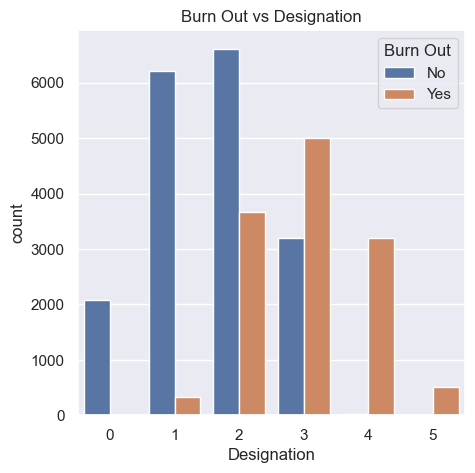

In [52]:
sns.countplot(x='Designation',hue='Burn Out',data=df)
sns.set(rc={'figure.figsize':(5,5)})
plt.title("Burn Out vs Designation");

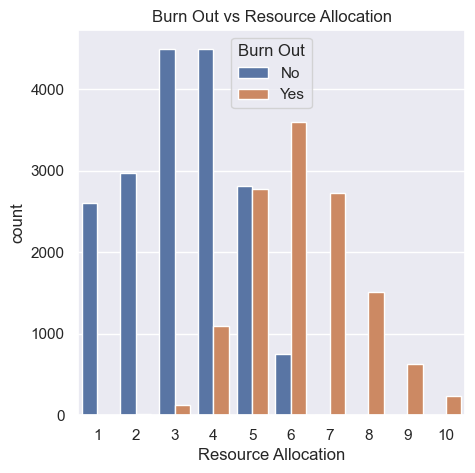

In [53]:
sns.countplot(x='Resource Allocation',hue='Burn Out',data=df)
sns.set(rc={'figure.figsize':(5,5)})
plt.title("Burn Out vs Resource Allocation");

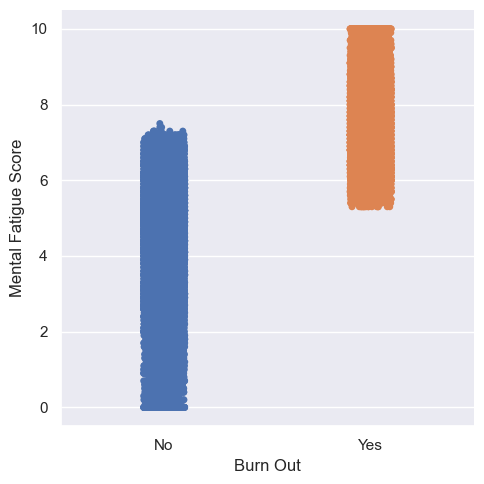

In [54]:
sns.catplot(x="Burn Out", y="Mental Fatigue Score", data=df);

### Feature Engineering

In [55]:
df['Month of Joining'] = df['Date of Joining'].dt.month

df['Quarter of Joining'] = df['Date of Joining'].dt.quarter

df.columns

Index(['Date of Joining', 'Gender', 'Company Type', 'WFH Setup Available',
       'Designation', 'Resource Allocation', 'Mental Fatigue Score',
       'Burn Rate', 'Month of Joining', 'Quarter of Joining',
       'Season of Joining', 'Burn Out'],
      dtype='object')

In [56]:
from datetime import date, datetime

seasons = {'Summer':(datetime(2008,6,21), datetime(2008,9,22)),
           'Autumn':(datetime(2008,9,23), datetime(2008,12,20)),
           'Spring':(datetime(2008,3,21), datetime(2008,6,20))}

In [57]:
def get_season(row):
    date = row['Date of Joining']
    for season,(season_start, season_end) in seasons.items():
        if date >= season_start and date <= season_end:
            return season
    else:
        return 'Winter'

In [58]:
df['Season of Joining'] = df.apply(lambda row: get_season(row), axis=1)

In [59]:
df.columns

Index(['Date of Joining', 'Gender', 'Company Type', 'WFH Setup Available',
       'Designation', 'Resource Allocation', 'Mental Fatigue Score',
       'Burn Rate', 'Month of Joining', 'Quarter of Joining',
       'Season of Joining', 'Burn Out'],
      dtype='object')

In [60]:
df.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Month of Joining,Quarter of Joining,Season of Joining,Burn Out
Employee ID,,,,,,,,,,,,
fffe32003000360033003200,2008-09-30,Female,Service,No,2,3,3.8,0.16,9,3,Autumn,No
fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2,5.0,0.36,11,4,Autumn,No
fffe32003400380032003900,2008-03-11,Male,Service,Yes,1,1,2.6,0.20,3,1,Winter,No
fffe31003900340031003600,2008-07-24,Female,Service,No,3,7,6.9,0.52,7,3,Summer,Yes
fffe3300350037003500,2008-11-26,Male,Product,Yes,2,4,3.6,0.29,11,4,Autumn,No


In [61]:
df.dtypes

Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                      int64
Resource Allocation              int64
Mental Fatigue Score           float64
Burn Rate                      float64
Month of Joining                 int64
Quarter of Joining               int64
Season of Joining               object
Burn Out                        object
dtype: object

### Encoding the categorical features

In [62]:
df = pd.get_dummies(data = df, columns = ['Gender', 'Company Type','WFH Setup Available','Season of Joining'], drop_first = False)
df.head()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Month of Joining,Quarter of Joining,Burn Out,Gender_Female,Gender_Male,Company Type_Product,Company Type_Service,WFH Setup Available_No,WFH Setup Available_Yes,Season of Joining_Autumn,Season of Joining_Spring,Season of Joining_Summer,Season of Joining_Winter
Employee ID,,,,,,,,,,,,,,,,,,
fffe32003000360033003200,2008-09-30,2,3,3.8,0.16,9,3,No,1,0,0,1,1,0,1,0,0,0
fffe3700360033003500,2008-11-30,1,2,5.0,0.36,11,4,No,0,1,0,1,0,1,1,0,0,0
fffe32003400380032003900,2008-03-11,1,1,2.6,0.20,3,1,No,0,1,0,1,0,1,0,0,0,1
fffe31003900340031003600,2008-07-24,3,7,6.9,0.52,7,3,Yes,1,0,0,1,1,0,0,0,1,0
fffe3300350037003500,2008-11-26,2,4,3.6,0.29,11,4,No,0,1,1,0,0,1,1,0,0,0


### Dealing with Class Imbalance

In [63]:
df['Burn Out'].value_counts()

No     18132
Yes    12708
Name: Burn Out, dtype: int64

In [64]:
from sklearn.utils import resample

# Checking the counts of different catogries in the target variable 
df['Burn Out'].value_counts()

# Separate majority and minority classes. We will use both classes, 'virginica' and 'versicolor' combined as majority class

df_majority = df[df['Burn Out']=="No"]
df_minority = df[df['Burn Out']=="Yes"]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=18132,     # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df = pd.concat([df_majority, df_minority_upsampled])

 
# Display new class counts
df["Burn Out"].value_counts()

No     18132
Yes    18132
Name: Burn Out, dtype: int64

In [65]:
df.columns

Index(['Date of Joining', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate', 'Month of Joining',
       'Quarter of Joining', 'Burn Out', 'Gender_Female', 'Gender_Male',
       'Company Type_Product', 'Company Type_Service',
       'WFH Setup Available_No', 'WFH Setup Available_Yes',
       'Season of Joining_Autumn', 'Season of Joining_Spring',
       'Season of Joining_Summer', 'Season of Joining_Winter'],
      dtype='object')

### Machine Leanring

In [66]:
from sklearn.model_selection import train_test_split # for splitting the data set
from sklearn.metrics import precision_score  # for calculating the precision score
from sklearn.metrics import accuracy_score  # for calculating the accuracy score
from sklearn.metrics import recall_score    # for calculating the recall score
from sklearn.metrics import f1_score       # for calculating the f1 score
from sklearn.metrics import classification_report # for classification report
from sklearn.metrics import confusion_matrix      # for classification matrix
from sklearn.metrics import roc_curve, roc_auc_score  

In [69]:
### Splitting Dataset into:
### 1: Features and Target
### 2: Train and Test

In [67]:
X = df.drop(['Date of Joining', 'Burn Out','Burn Rate'], axis = 1) ## Features Varibles
Y = df["Burn Out"]  ## Target, Label, Dependent, Predicted

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=12)

In [69]:
X_train

,Designation,Resource Allocation,Mental Fatigue Score,Month of Joining,Quarter of Joining,Gender_Female,Gender_Male,Company Type_Product,Company Type_Service,WFH Setup Available_No,WFH Setup Available_Yes,Season of Joining_Autumn,Season of Joining_Spring,Season of Joining_Summer,Season of Joining_Winter
Employee ID,,,,,,,,,,,,,,,
fffe32003800390039003700,1,1,0.5,6,2,0,1,1,0,0,1,0,1,0,0
fffe33003100310039003900,3,6,7.4,1,1,1,0,1,0,1,0,0,0,0,1
fffe3800390033003700,2,4,5.8,1,1,0,1,0,1,0,1,0,0,0,1
fffe32003400300034003500,3,7,7.8,5,2,0,1,0,1,1,0,0,1,0,0
fffe31003200300031003400,1,3,6.8,1,1,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe32003900320034003800,2,4,4.7,10,4,0,1,0,1,1,0,1,0,0,0
fffe32003900350039003300,3,4,4.9,6,2,1,0,1,0,0,1,0,1,0,0
fffe32003800330031003300,3,5,4.6,1,1,1,0,1,0,1,0,0,0,0,1


In [72]:
Y_train

Employee ID
fffe32003800390039003700     No
fffe33003100310039003900    Yes
fffe3800390033003700        Yes
fffe32003400300034003500    Yes
fffe31003200300031003400     No
                           ... 
fffe32003900320034003800     No
fffe32003900350039003300     No
fffe32003800330031003300     No
fffe32003100360036003500    Yes
fffe32003500330031003100     No
Name: Burn Out, Length: 27198, dtype: object

In [74]:
X_test

,Designation,Resource Allocation,Mental Fatigue Score,Month of Joining,Quarter of Joining,Gender_Female,Gender_Male,Company Type_Product,Company Type_Service,WFH Setup Available_No,WFH Setup Available_Yes,Season of Joining_Autumn,Season of Joining_Spring,Season of Joining_Summer,Season of Joining_Winter
Employee ID,,,,,,,,,,,,,,,
fffe31003000320037003500,0,1,4.3,3,1,1,0,0,1,0,1,0,0,0,1
fffe3700380030003600,1,3,4.8,3,1,1,0,1,0,1,0,0,1,0,0
fffe32003700320036003800,1,4,5.2,12,4,1,0,0,1,0,1,1,0,0,0
fffe32003300340039003100,1,2,4.8,4,2,0,1,0,1,1,0,0,1,0,0
fffe33003400360034003600,1,3,5.5,3,1,0,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe32003300390030003200,1,2,4.2,8,3,0,1,0,1,1,0,0,0,1,0
fffe3600300034003500,2,3,2.4,9,3,0,1,0,1,1,0,1,0,0,0
fffe350037003500,2,3,2.6,7,3,1,0,1,0,0,1,0,0,1,0


In [75]:
Y_test

Employee ID
fffe31003000320037003500     No
fffe3700380030003600         No
fffe32003700320036003800     No
fffe32003300340039003100     No
fffe33003400360034003600     No
                           ... 
fffe32003300390030003200     No
fffe3600300034003500         No
fffe350037003500             No
fffe31003500390032003000     No
fffe32003100350031003800    Yes
Name: Burn Out, Length: 9066, dtype: object

### Decision Tree Classifier

In [76]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=123)
class_tree = DecisionTreeClassifier(splitter='best', random_state=123, min_samples_split=30, min_samples_leaf=10)

# 3. Use the trainning data to train the estimator
model_dtc = class_tree.fit(X_train, Y_train)

Y_pred = model_dtc.predict(X_test)

In [77]:
Y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [78]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_pred, Y_test)
print('DecisionTreeClassifier Model accuracy score: {0:0.4f}'.format(accuracy_score(Y_test, Y_pred)*100))

DecisionTreeClassifier Model accuracy score: 95.3011


In [79]:
# Calculating and viewing the precision score for the decision tree model

precision_dtc = precision_score(Y_test, Y_pred, pos_label="Yes")
print('Decision Tree Model Precision score: {0:0.4f}'.format(precision_dtc*100))

Decision Tree Model Precision score: 95.5521


In [80]:
# Calculating and viewing the recall score for the decision tree model

recall_dtc = recall_score(Y_test, Y_pred, pos_label="Yes")
print('Decision Tree Model Recall score: {0:0.4f}'.format(recall_dtc*100))

Decision Tree Model Recall score: 95.0473


In [81]:
# Calculating and viewing the f1 score for the decision tree model

f1_score_dtc = f1_score(Y_test, Y_pred, pos_label="Yes")
print('Decision Tree Model f1 score: {0:0.4f}'.format(f1_score_dtc*100))

Decision Tree Model f1 score: 95.2991


In [82]:
#Classification Metrices

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

          No       0.95      0.96      0.95      4523
         Yes       0.96      0.95      0.95      4543

    accuracy                           0.95      9066
   macro avg       0.95      0.95      0.95      9066
weighted avg       0.95      0.95      0.95      9066



In [83]:
#Confusion-matrix
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[4322  201]
 [ 225 4318]]

True Positives(TP) =  4322

True Negatives(TN) =  4318

False Positives(FP) =  201

False Negatives(FN) =  225


<AxesSubplot:>

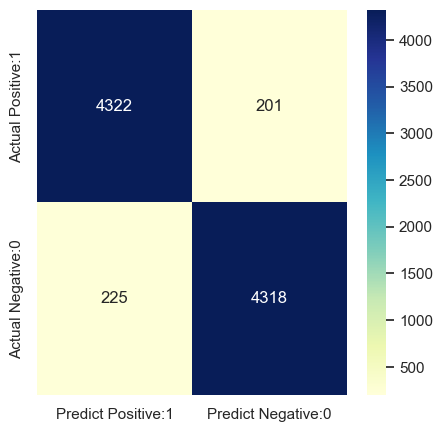

In [84]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Predict Positive:1', 'Predict Negative:0'], 
                                 index=['Actual Positive:1', 'Actual Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

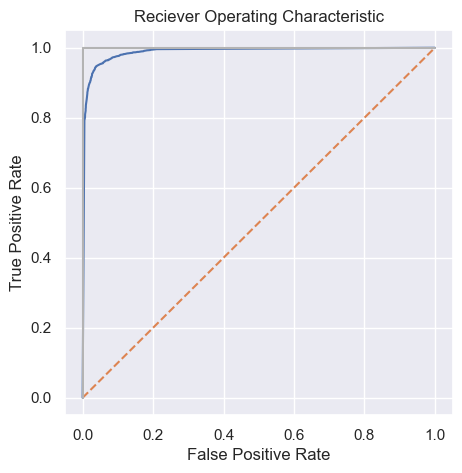

In [85]:
from sklearn.metrics import roc_curve, roc_auc_score

# get predicted probabilities
Y_probabilities = model_dtc.predict_proba(X_test)[:,1]

# create true and positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test, Y_probabilities,pos_label = "Yes")

# plot ROC curve
plt.title("Reciever Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1,0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [86]:
model_dtc.predict_proba(X_test)[0:1]

array([[1., 0.]])

In [87]:
# calculate area under curve
roc_auc_dtc = roc_auc_score(Y_test, Y_probabilities)
roc_auc_dtc

0.9882261227607237

### Light Gradient Boosting machine 

In [69]:
from lightgbm import LGBMClassifier
import lightgbm as lgb

In [70]:
model_lgb = lgb.LGBMClassifier(n_estimators=1000)
model_lgb.fit(X_train, Y_train)

LGBMClassifier(n_estimators=1000)

In [71]:
# predict the results
Y_pred_lgb=model_lgb.predict(X_test)

In [72]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_pred_lgb, Y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(Y_test, Y_pred_lgb)*100))

LightGBM Model accuracy score: 96.0622


In [73]:
# Calculating and viewing the precision score for the decision tree model

precision_lgb = precision_score(Y_test, Y_pred_lgb, pos_label="Yes")
print('LGB Model Precision score: {0:0.4f}'.format(precision_lgb*100))

LGB Model Precision score: 95.9193


In [74]:
# Calculating and viewing the recall score for the decision tree model

recall_lgb = recall_score(Y_test, Y_pred_lgb, pos_label="Yes")
print('LGB Model Recall score: {0:0.4f}'.format(recall_lgb*100))

LGB Model Recall score: 96.2360


In [75]:
# Calculating and viewing the f1 score for the decision tree model

f1_score_lgb = f1_score(Y_test, Y_pred_lgb, pos_label="Yes")
print('LGB Model f1 score: {0:0.4f}'.format(f1_score_lgb*100))

LGB Model f1 score: 96.0774


In [76]:
#Confusion-matrix
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_lgb)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[4337  186]
 [ 171 4372]]

True Positives(TP) =  4337

True Negatives(TN) =  4372

False Positives(FP) =  186

False Negatives(FN) =  171


<AxesSubplot:>

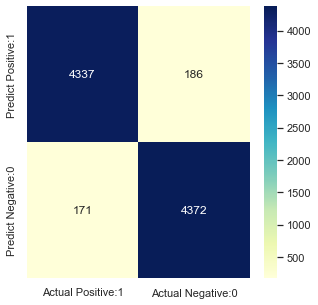

In [77]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [78]:
#Classification Metrices

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_lgb))

              precision    recall  f1-score   support

          No       0.96      0.96      0.96      4523
         Yes       0.96      0.96      0.96      4543

    accuracy                           0.96      9066
   macro avg       0.96      0.96      0.96      9066
weighted avg       0.96      0.96      0.96      9066



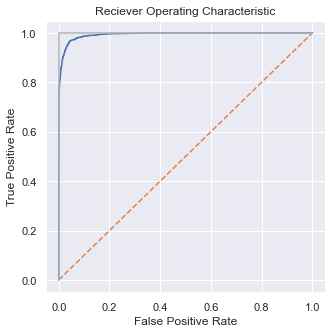

In [79]:
from sklearn.metrics import roc_curve, roc_auc_score

# get predicted probabilities
Y_probabilities = model_lgb.predict_proba(X_test)[:,1]

# create true and positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test, Y_probabilities,pos_label = "Yes")

# plot ROC curve
plt.title("Reciever Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1,0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [80]:
model_lgb.predict_proba(X_test)[0:1]

array([[9.99999974e-01, 2.59618534e-08]])

In [81]:
# calculate area under curve
roc_auc_lgb = roc_auc_score(Y_test, Y_probabilities)
roc_auc_lgb

0.9931894065156448

### Logistics Regression 

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
logistic_regression = LogisticRegression(max_iter=1000)
model_lgr = logistic_regression.fit(X_train, Y_train)



# predict the results
Y_pred_lgr=model_lgr.predict(X_test)

In [84]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_pred_lgr, Y_test)
print('Logistic Regression Model accuracy score: {0:0.4f}'.format(accuracy_score(Y_test, Y_pred_lgr)*100))

Logistic Regression Model accuracy score: 94.8489


In [85]:
# Calculating and viewing the recall score for the decision tree model

recall_lgr = recall_score(Y_test, Y_pred_lgr, pos_label="Yes")
print('Logistics Regresion Model Recall score: {0:0.4f}'.format(recall_lgr*100))

Logistics Regresion Model Recall score: 95.1354


In [86]:
# Calculating and viewing the precision score for the decision tree model

precision_lgr = precision_score(Y_test, Y_pred_lgr, pos_label="Yes")
print('Logistics Model Precision score: {0:0.4f}'.format(precision_lgr*100))

Logistics Model Precision score: 94.6147


In [87]:
# Calculating and viewing the f1 score for the decision tree model

f1_score_lgr = f1_score(Y_test, Y_pred_lgr, pos_label="Yes")
print('Logistics Forest Model f1 score: {0:0.4f}'.format(f1_score_lgr*100))

Logistics Forest Model f1 score: 94.8743


In [88]:
#Confusion-matrix
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_lgr)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[4277  246]
 [ 221 4322]]

True Positives(TP) =  4277

True Negatives(TN) =  4322

False Positives(FP) =  246

False Negatives(FN) =  221


<AxesSubplot:>

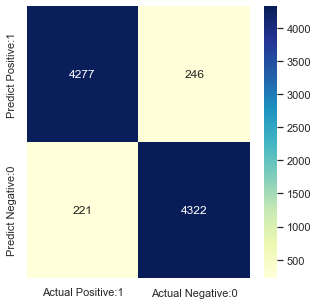

In [89]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [90]:
#Classification Metrices

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_lgr))

              precision    recall  f1-score   support

          No       0.95      0.95      0.95      4523
         Yes       0.95      0.95      0.95      4543

    accuracy                           0.95      9066
   macro avg       0.95      0.95      0.95      9066
weighted avg       0.95      0.95      0.95      9066



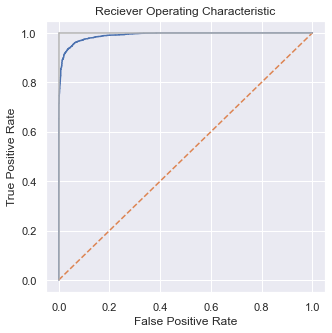

In [91]:
from sklearn.metrics import roc_curve, roc_auc_score

# get predicted probabilities
Y_probabilities = model_lgr.predict_proba(X_test)[:,1]

# create true and positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test, Y_probabilities,pos_label = "Yes")

# plot ROC curve
plt.title("Reciever Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1,0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [92]:
model_lgr.predict_proba(X_test)[0:1]

array([[9.99993527e-01, 6.47348540e-06]])

In [93]:
# calculate area under curve
roc_auc_lgr = roc_auc_score(Y_test, Y_probabilities)
roc_auc_lgr

0.990330732608432

### Random Forest Classifier

In [94]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000)

In [95]:
model_rf = rf.fit(X_train, Y_train)

In [96]:
Y_pred_rf = rf.predict(X_test)

In [97]:
print('Random Forest Model accuracy score: {0:0.4f}'.format(accuracy_score(Y_test, Y_pred_rf)*100))

Random Forest Model accuracy score: 96.0071


In [98]:
# Calculating and viewing the precision score for the decision tree model

precision_rf = precision_score(Y_test, Y_pred_rf, pos_label="Yes")
print('Random Forest Model Precision score: {0:0.4f}'.format(precision_rf*100))

Random Forest Model Precision score: 95.5744


In [99]:
# Calculating and viewing the recall score for the decision tree model

recall_rf = recall_score(Y_test, Y_pred_rf, pos_label="Yes")
print('Random Forest Model Recall score: {0:0.4f}'.format(recall_rf*100))

Random Forest Model Recall score: 96.5001


In [100]:
# Calculating and viewing the f1 score for the decision tree model

f1_score_rf = f1_score(Y_test, Y_pred_rf, pos_label="Yes")
print('Random Forest Model f1 score: {0:0.4f}'.format(f1_score_rf*100))

Random Forest Model f1 score: 96.0350


In [101]:
#Confusion-matrix
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[4320  203]
 [ 159 4384]]

True Positives(TP) =  4320

True Negatives(TN) =  4384

False Positives(FP) =  203

False Negatives(FN) =  159


<AxesSubplot:>

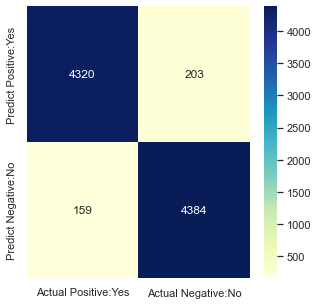

In [102]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:Yes', 'Actual Negative:No'], 
                                 index=['Predict Positive:Yes', 'Predict Negative:No'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [103]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred_rf))

              precision    recall  f1-score   support

          No       0.96      0.96      0.96      4523
         Yes       0.96      0.97      0.96      4543

    accuracy                           0.96      9066
   macro avg       0.96      0.96      0.96      9066
weighted avg       0.96      0.96      0.96      9066



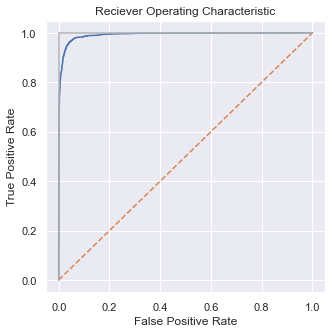

In [104]:
from sklearn.metrics import roc_curve, roc_auc_score

# get predicted probabilities
Y_probabilities = model_rf.predict_proba(X_test)[:,1]

# create true and positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test, Y_probabilities,pos_label = "Yes")

# plot ROC curve
plt.title("Reciever Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1,0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [105]:
model_rf.predict_proba(X_test)[0:1]

array([[1., 0.]])

In [106]:
# calculate area under curve
roc_auc_rf = roc_auc_score(Y_test, Y_probabilities)
roc_auc_rf

0.9917518449129011

#### Summary of Evaluation Metrics

#### Step 1. Create Pandas Series for all the Matrices Used

In [107]:
Precision_Score = {'Decision Tree': precision_dtc*100, 'Logistic Regression': precision_lgr*100, 'Light Gradient Boasitng Machine': precision_lgb*100,
            'Random Forest': precision_rf*100}
Precision_Score = pd.Series(Precision_Score)
Precision_Score

Decision Tree                      95.552113
Logistic Regression                94.614711
Light Gradient Boasitng Machine    95.919263
Random Forest                      95.574450
dtype: float64

In [108]:
Accuracy_Score = {'Decision Tree': accuracy_score(Y_test, Y_pred)*100, 'Logistic Regression': accuracy_score(Y_test, Y_pred_lgr)*100, 'Light Gradient Boasitng Machine': accuracy_score(Y_test, Y_pred_lgb)*100,
             'Random Forest': accuracy_score(Y_test, Y_pred_rf)*100}
Accuracy_Score = pd.Series(Accuracy_Score)
Accuracy_Score

Decision Tree                      95.301125
Logistic Regression                94.848886
Light Gradient Boasitng Machine    96.062210
Random Forest                      96.007059
dtype: float64

In [109]:
Recall_Score = {'Decision Tree': recall_dtc*100, 'Logistic Regression': recall_lgr*100, 'Light Gradient Boasitng Machine': recall_lgb*100,
             'Random Forest': recall_rf*100}
Recall_Score = pd.Series(Recall_Score)
Recall_Score

Decision Tree                      95.047326
Logistic Regression                95.135373
Light Gradient Boasitng Machine    96.235967
Random Forest                      96.500110
dtype: float64

In [110]:
f1_Score = {'Decision Tree': f1_score_dtc*100, 'Logistic Regression': f1_score_lgr*100, 'Light Gradient Boasitng Machine': f1_score_lgb*100,
              'Random Forest': f1_score_rf*100}
f1_Score = pd.Series(f1_Score)
f1_Score

Decision Tree                      95.299051
Logistic Regression                94.874328
Light Gradient Boasitng Machine    96.077354
Random Forest                      96.035049
dtype: float64

In [111]:
ROC_AUC_Score = {'Decision Tree': roc_auc_dtc*100, 'Logistic Regression': roc_auc_lgr*100, 'Light Gradient Boasitng Machine': roc_auc_lgb*100,
            'Random Forest': roc_auc_rf*100}
ROC_AUC_Score = pd.Series(ROC_AUC_Score)
ROC_AUC_Score

Decision Tree                      98.822612
Logistic Regression                99.033073
Light Gradient Boasitng Machine    99.318941
Random Forest                      99.175184
dtype: float64

#### Step 2. Concating all the series together to get a dataframe

In [112]:
Models = {'Decision Tree': "Decison_Tree_Model", 'Logistic Regression': "Logistic_Regression_Model", 'Light Gradient Boasitng Machine': "Light Gradient Boasitng Machine",
              'Random Forest': "Random_Forest_Model"}
Models = pd.Series(Models)
Models

Decision Tree                                   Decison_Tree_Model
Logistic Regression                      Logistic_Regression_Model
Light Gradient Boasitng Machine    Light Gradient Boasitng Machine
Random Forest                                  Random_Forest_Model
dtype: object

In [113]:
cmm = pd.DataFrame({'Models':Models, 'Accuracy_Score': Accuracy_Score,'Precision_Score': Precision_Score,
                    'Recall_Score': Recall_Score,'f1_Score': f1_Score, 
                    'ROC_AUC_Score': ROC_AUC_Score})

In [114]:
cmm = pd.DataFrame({'Models':Models, 'Accuracy_Score': Accuracy_Score,'Precision_Score': Precision_Score,
                    'Recall_Score': Recall_Score,'f1_Score': f1_Score, 'ROC_AUC_Score': ROC_AUC_Score})

In [115]:
cmm_df = cmm.reset_index(drop=True)
cmm_df

,Models,Accuracy_Score,Precision_Score,Recall_Score,f1_Score,ROC_AUC_Score
0,Decison_Tree_Model,95.301125,95.552113,95.047326,95.299051,98.822612
1,Logistic_Regression_Model,94.848886,94.614711,95.135373,94.874328,99.033073
2,Light Gradient Boasitng Machine,96.062210,95.919263,96.235967,96.077354,99.318941
3,Random_Forest_Model,96.007059,95.574450,96.500110,96.035049,99.175184
